In [1]:
from tensorflow.keras.models import load_model

from generators import Singlet

In [ ]:
#base_model_history = pickle.load(open(C.base_model+"_history", "rb"))
trained_model = load_model(model_path("trained_"+C.base_model))
datagen = Singlet(batch_size=1, directory=C.val_dir, steps_per_epoch=1000)

In [ ]:
def plot_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training data loss')
    plt.plot(history.history['val_loss'], label='Validation data loss')
    plt.legend()
    plt.title("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['acc'], label='Training data accuracy')
    plt.plot(history.history['val_acc'], label='Validation data accuracy')
    plt.legend()
    plt.title("Accuracy")
    plt.suptitle("Model performance - {}".format(C.base_model))
    plt.show()
plot_history(history)

In [ ]:
def print_summary(model, val_generator):
    score = model.evaluate_generator( val_generator, steps=C.base_validation_steps)
    summary = "Validation loss: {}\nValidation accuracy: {}".format(
        score[0], score[1])
    print(summary)
print_summary(trained_model, datagen)

In [ ]:
def plot_confusion_matrix(model, val_generator):
    img_vals = []
    stat_vals = []
    y_vals = []
    for i in range(C.base_validation_steps):
        x, y = val_generator[i]
        if len(x) == 2:
            img_vals.append(x[0])
            stat_vals.append(x[1])
        else:
            img_vals.append(x)
        y_vals.append(y)
    if stat_vals:
        X_validation = [np.concatenate(img_vals), np.concatenate(stat_vals)]
    else:
        X_validation = [np.concatenate(img_vals)]
    y_target = np.concatenate(y_vals)
    y_predicted = np.argmax(model.predict(X_validation), axis=1)
    cm = confusion_matrix(y_target, y_predicted)
    for i in range(len(cm)):
        cm[i, i] = 0

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, cmap="Greys")
    plt.xticks(range(max(y_target+1)))
    plt.yticks(range(max(y_target+1)))
    plt.title("Confusion matrix")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.savefig(os.path.join(outputfolder, 'model_confusion_matrix.png'))
    plt.show()

plot_confusion_matrix(trained_model, datagen)

In [2]:
from create_siamese_model import initialize_bitvector_model
from generators import Singlet
import config as C

import numpy as np

In [3]:
bitvector_model = initialize_bitvector_model()
#bitvector_history = pickle.load(open("siamese_"+C.base_model+"_history", "rb"))

Loading model:models/bitvector_inception.model
Instructions for updating:
Colocations handled automatically by placer.


ValueError: axes don't match array

In [7]:
#plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
#plt.plot(bitvector_history['loss'], label='Training data loss')
#plt.legend()
#plt.title("Loss")

In [14]:
nrSamples = 1000
datagen = Singlet(batch_size=1, directory=C.val_dir, steps_per_epoch=1000)
imgs = []
labels = []
embeddings = []
for i in range(nrSamples):
    X, y = datagen[i]
    imgs.append(X)
    labels.append(y)
    embeddings.append(bitvector_model.predict_on_batch(X))
    
X = np.stack(embeddings).reshape((nrSamples, C.out_dim))
y = np.asarray(labels).reshape((nrSamples,))

X.shape, y.shape

((1000, 64), (1000,))

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [6]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]
X.shape, y.shape

((500, 64), (500,))

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)


In [17]:
X_2d = tsne.fit_transform(X)

No handles with labels found to put in legend.


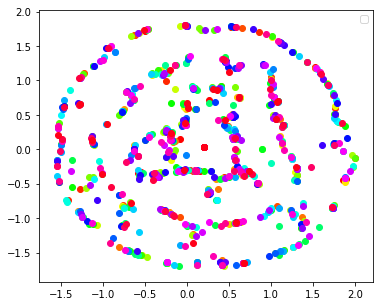

In [19]:
from matplotlib import pyplot as plt

cmap = plt.cm.get_cmap('hsv', 40)
plt.figure(figsize=(6, 5))

for i in range(40):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=[cmap(i)])
plt.legend()
plt.show()